# Problem-1(a)

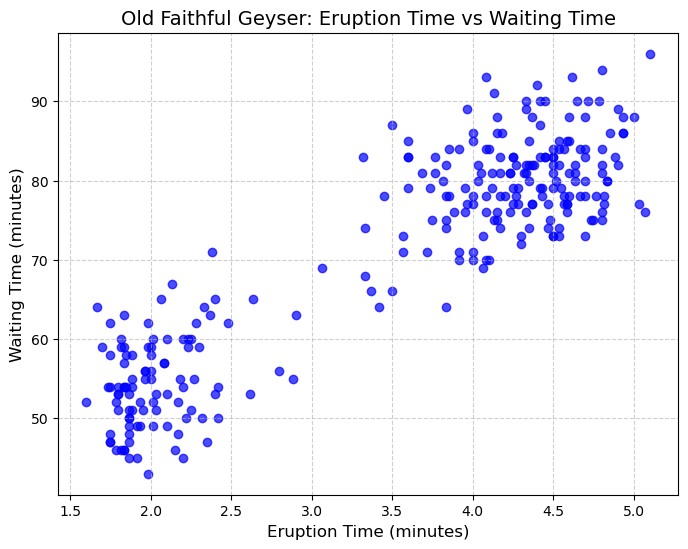

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\srava\Downloads\faithful.csv"  # Replace with your file path if needed
data = pd.read_csv(file_path)

# Scatter plot of eruption time vs. waiting time
plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], color='blue', alpha=0.7)
plt.title("Old Faithful Geyser: Eruption Time vs Waiting Time", fontsize=14)
plt.xlabel("Eruption Time (minutes)", fontsize=12)
plt.ylabel("Waiting Time (minutes)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Problem-2(a)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\srava\Downloads\faithful.csv'  
data = pd.read_csv(file_path)
X = data[['eruptions', 'waiting']].values  # Only use eruption and waiting times

# K-means implementation from scratch
def k_means(X, k, max_iters=100, tol=1e-4):
   
    # Randomly initialize centroids from the data points
    np.random.seed(42)
    initial_idx = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[initial_idx]

    obj_function = []  # To track objective function values
    for _ in range(max_iters):
        # Step 1: Assign points to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Pairwise distance
        labels = np.argmin(distances, axis=1)

        # Step 2: Recalculate centroids as the mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Step 3: Compute the objective function (sum of squared distances to centroids)
        obj_value = sum(np.min(distances**2, axis=1))
        obj_function.append(obj_value)

        # Check for convergence (centroid movement below tolerance)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels, obj_function

# Apply k-means with 2 clusters (as identified in Problem 1)
k = 2
centroids, labels, obj_function = k_means(X, k)



# Problem-2(b)

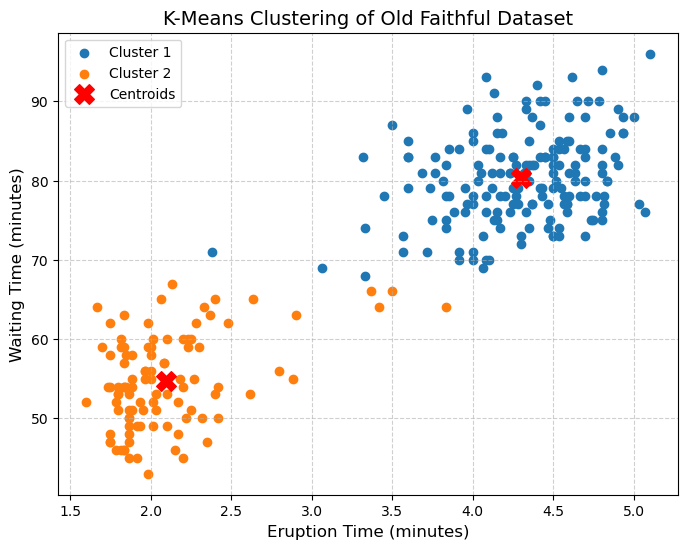

In [17]:
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(X[labels == cluster, 0], X[labels == cluster, 1], label=f"Cluster {cluster + 1}")
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering of Old Faithful Dataset", fontsize=14)
plt.xlabel("Eruption Time (minutes)", fontsize=12)
plt.ylabel("Waiting Time (minutes)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Problem-3(b)

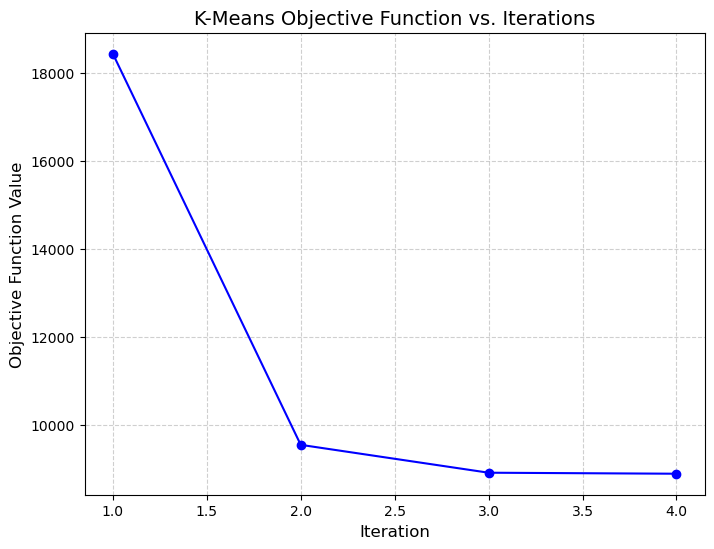

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(obj_function) + 1), obj_function, marker='o', color='blue')
plt.title("K-Means Objective Function vs. Iterations", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Objective Function Value", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()